# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

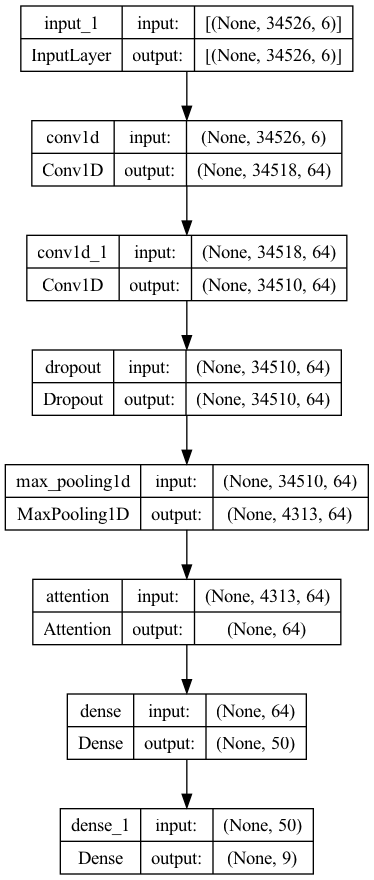

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         2304      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 554s 2s/step - loss: 3.7847 - ERM: 0.1266 - KDEL: 0.1377 - LMA: 0.0233 - MITO: 0.0834 - NES: 0.0265 - NIK: 0.0476 - NLS: 0.0172 - NUCP: 0.0128 - OMM: -0.0066 - val_loss: 2.1862 - val_ERM: 0.1755 - val_KDEL: 0.4325 - val_LMA: 0.4457 - val_MITO: 0.2028 - val_NES: -0.0674 - val_NIK: 0.2147 - val_NLS: -0.3316 - val_NUCP: -0.1833 - val_OMM: 0.0273
Epoch 2/100
311/311 [==============================] - 603s 2s/step - loss: 2.1858 - ERM: 0.1898 - KDEL: 0.2455 - LMA: 0.0127 - MITO: 0.0184 - NES: 0.0055 - NIK: 0.1016 - NLS: 0.0715 - NUCP: -0.0663 - OMM: 0.0095 - val_loss: 2.1752 - val_ERM: 0.1935 - val_KDEL: 0.4187 - val_LMA: 0.4402 - val_MITO: 0.2653 - val_NES: -0.1659 - val_NIK: 0.2540 - val_NLS: -0.2087 - val_NUCP: -0.1768 - val_OMM: -0.2043
Epoch 3/100
311/311 [==============================] - 625s 2s/step - loss: 2.1746 - ERM: 0.2476 - KDEL: 0.2988 - LMA: 0.0398 - MITO: 0.0922 - NES: 7.9681e-04 - NIK: 0.1233 - NLS: 0.0932 - NUCP: 0.00

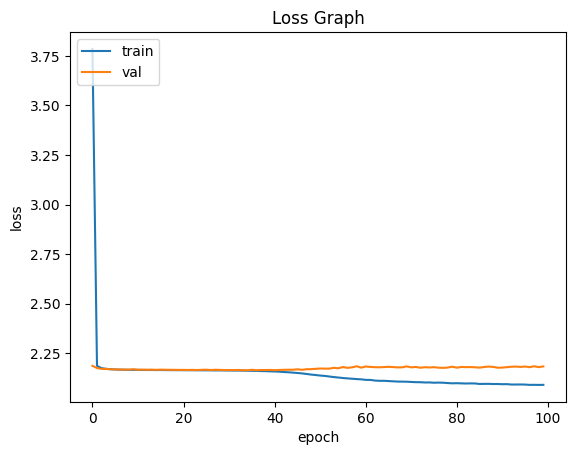

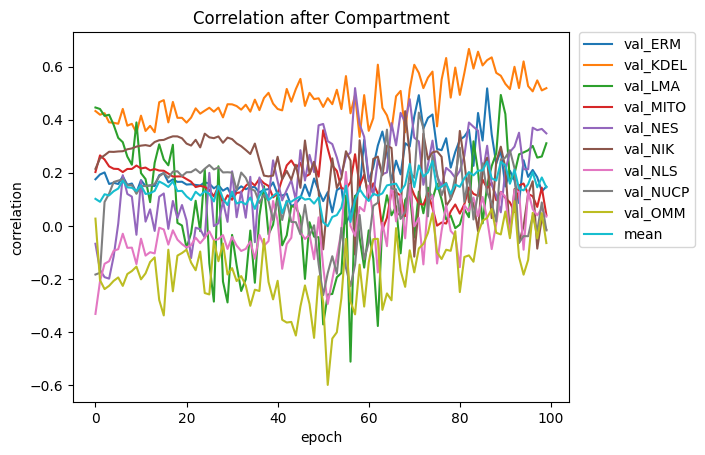

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

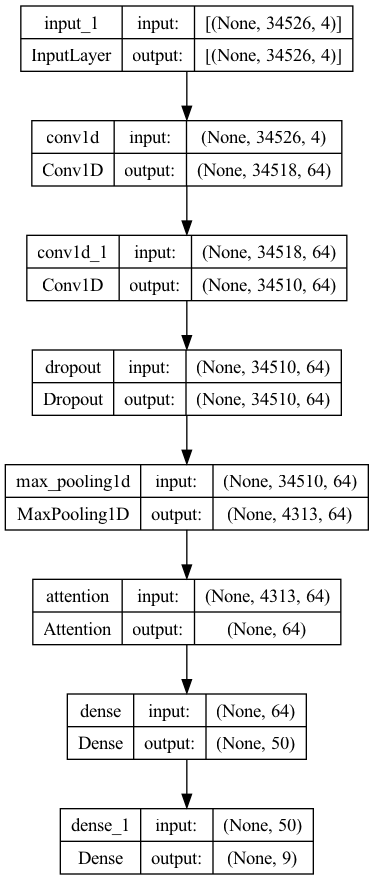

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [9]:
model.save_model(model_output_path)